In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df = pd.read_csv('drive/My Drive/kendaraan_train.csv')
df = df.fillna(method='ffill')
df.head()

,id,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,1,Wanita,30.0,1.0,33.0,1.0,< 1 Tahun,Tidak,28029.0,152.0,97.0,0
1,2,Pria,48.0,1.0,39.0,0.0,> 2 Tahun,Pernah,25800.0,29.0,158.0,0
2,3,Pria,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,32733.0,160.0,119.0,0
3,4,Wanita,58.0,1.0,48.0,0.0,1-2 Tahun,Tidak,2630.0,124.0,63.0,0
4,5,Pria,50.0,1.0,35.0,0.0,> 2 Tahun,Tidak,34857.0,88.0,194.0,0


In [9]:
df['Umur_Kendaraan'] = df['Umur_Kendaraan'].replace(['< 1 Tahun','1-2 Tahun','> 2 Tahun'],['0','1','2'])
df

,id,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,1,Wanita,30.0,1.0,33.0,1.0,0,Tidak,28029.0,152.0,97.0,0
1,2,Pria,48.0,1.0,39.0,0.0,2,Pernah,25800.0,29.0,158.0,0
2,3,Pria,21.0,1.0,46.0,1.0,0,Tidak,32733.0,160.0,119.0,0
3,4,Wanita,58.0,1.0,48.0,0.0,1,Tidak,2630.0,124.0,63.0,0
4,5,Pria,50.0,1.0,35.0,0.0,2,Tidak,34857.0,88.0,194.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
285826,285827,Wanita,23.0,1.0,4.0,1.0,0,Tidak,25988.0,152.0,217.0,0
285827,285828,Wanita,21.0,1.0,46.0,1.0,0,Tidak,44686.0,152.0,50.0,0
285828,285829,Wanita,23.0,1.0,50.0,1.0,0,Tidak,49751.0,152.0,226.0,0
285829,285830,Pria,68.0,1.0,7.0,1.0,1,Tidak,30503.0,124.0,270.0,0


In [10]:
df_test = pd.read_csv('drive/My Drive/kendaraan_test.csv')
df_test = df_test.fillna(method='ffill')
df_test.head()

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,Wanita,49,1,8,0,1-2 Tahun,Pernah,46963,26,145,0
1,Pria,22,1,47,1,< 1 Tahun,Tidak,39624,152,241,0
2,Pria,24,1,28,1,< 1 Tahun,Tidak,110479,152,62,0
3,Pria,46,1,8,1,1-2 Tahun,Tidak,36266,124,34,0
4,Pria,35,1,23,0,1-2 Tahun,Pernah,26963,152,229,0


In [11]:
df_test['Umur_Kendaraan'] = df_test['Umur_Kendaraan'].replace(['< 1 Tahun','1-2 Tahun','> 2 Tahun'],['0','1','2'])
df_test

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,Wanita,49,1,8,0,1,Pernah,46963,26,145,0
1,Pria,22,1,47,1,0,Tidak,39624,152,241,0
2,Pria,24,1,28,1,0,Tidak,110479,152,62,0
3,Pria,46,1,8,1,1,Tidak,36266,124,34,0
4,Pria,35,1,23,0,1,Pernah,26963,152,229,0
...,...,...,...,...,...,...,...,...,...,...,...
47634,Pria,61,1,46,0,2,Pernah,31039,124,67,0
47635,Pria,41,1,15,0,1,Pernah,2630,157,232,0
47636,Pria,24,1,29,1,0,Tidak,33101,152,211,0
47637,Pria,59,1,30,0,1,Pernah,37788,26,239,1


In [12]:
#Normalisasi
def normalisasi(x):
    return(x-x.min())/(x.max()-x.min())

normalisasi_kolom = ['Umur', 'Kode_Daerah', 'Premi', 'Kanal_Penjualan', 'Lama_Berlangganan']

In [13]:
Q1 = df[normalisasi_kolom].quantile(0.25)
Q3 = df[normalisasi_kolom].quantile(0.75)
IQR = Q3 - Q1

df = df[~((df[normalisasi_kolom] < (Q1 - 1.5 * IQR)) | (df[normalisasi_kolom] > (Q3 + 1.5 * IQR))).any(axis=1)]
df

,id,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,1,Wanita,30.0,1.0,33.0,1.0,0,Tidak,28029.0,152.0,97.0,0
1,2,Pria,48.0,1.0,39.0,0.0,2,Pernah,25800.0,29.0,158.0,0
2,3,Pria,21.0,1.0,46.0,1.0,0,Tidak,32733.0,160.0,119.0,0
3,4,Wanita,58.0,1.0,48.0,0.0,1,Tidak,2630.0,124.0,63.0,0
4,5,Pria,50.0,1.0,35.0,0.0,2,Tidak,34857.0,88.0,194.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
285826,285827,Wanita,23.0,1.0,4.0,1.0,0,Tidak,25988.0,152.0,217.0,0
285827,285828,Wanita,21.0,1.0,46.0,1.0,0,Tidak,44686.0,152.0,50.0,0
285828,285829,Wanita,23.0,1.0,50.0,1.0,0,Tidak,49751.0,152.0,226.0,0
285829,285830,Pria,68.0,1.0,7.0,1.0,1,Tidak,30503.0,124.0,270.0,0


In [14]:
Q1 = df_test[normalisasi_kolom].quantile(0.25)
Q3 = df_test[normalisasi_kolom].quantile(0.75)
IQR = Q3 - Q1

df_test = df_test[~((df_test[normalisasi_kolom] < (Q1 - 1.5 * IQR)) | (df_test[normalisasi_kolom] > (Q3 + 1.5 * IQR))).any(axis=1)]
df_test

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,Wanita,49,1,8,0,1,Pernah,46963,26,145,0
1,Pria,22,1,47,1,0,Tidak,39624,152,241,0
3,Pria,46,1,8,1,1,Tidak,36266,124,34,0
4,Pria,35,1,23,0,1,Pernah,26963,152,229,0
5,Pria,26,1,28,1,0,Tidak,42721,152,198,0
...,...,...,...,...,...,...,...,...,...,...,...
47634,Pria,61,1,46,0,2,Pernah,31039,124,67,0
47635,Pria,41,1,15,0,1,Pernah,2630,157,232,0
47636,Pria,24,1,29,1,0,Tidak,33101,152,211,0
47637,Pria,59,1,30,0,1,Pernah,37788,26,239,1


In [15]:
df2 = df.fillna(method='ffill')

In [16]:
df = normalisasi(df[normalisasi_kolom])
df['Tertarik'] = df2['Tertarik']
df = df.dropna()
df.isnull().sum()

Umur                 0
Kode_Daerah          0
Premi                0
Kanal_Penjualan      0
Lama_Berlangganan    0
Tertarik             0
dtype: int64

In [17]:
df_test2 = df_test.fillna(method='ffill')

In [18]:
df_test = normalisasi(df_test[normalisasi_kolom])
df_test['Tertarik'] = df_test2['Tertarik']
df_test = df_test.dropna()
df_test.isnull().sum()

Umur                 0
Kode_Daerah          0
Premi                0
Kanal_Penjualan      0
Lama_Berlangganan    0
Tertarik             0
dtype: int64

In [25]:
x_train = df.drop(['Tertarik'], axis = 1)[:40000]
x_test = df_test.drop(['Tertarik'], axis = 1)[:10000]

In [26]:
x_train

,Umur,Kode_Daerah,Premi,Kanal_Penjualan,Lama_Berlangganan
0,0.153846,0.634615,0.428921,0.932099,0.301038
1,0.430769,0.750000,0.391279,0.172840,0.512111
2,0.015385,0.884615,0.508359,0.981481,0.377163
3,0.584615,0.923077,0.000000,0.759259,0.183391
4,0.461538,0.673077,0.544228,0.537037,0.636678
...,...,...,...,...,...
41047,0.323077,0.269231,0.484329,0.759259,0.117647
41048,0.353846,0.288462,0.000000,0.154321,0.906574
41049,0.400000,0.153846,0.700149,0.759259,0.813149
41050,0.061538,0.230769,0.490965,0.932099,0.771626


In [27]:
x_test

,Umur,Kode_Daerah,Premi,Kanal_Penjualan,Lama_Berlangganan
0,0.446154,0.153846,0.745581,0.154321,0.467128
1,0.030769,0.903846,0.622156,0.932099,0.799308
3,0.400000,0.153846,0.565682,0.759259,0.083045
4,0.230769,0.442308,0.409226,0.932099,0.757785
5,0.092308,0.538462,0.674240,0.932099,0.650519
...,...,...,...,...,...
10296,0.707692,0.538462,0.513648,0.746914,0.678201
10297,0.723077,0.538462,0.985234,0.141975,0.221453
10298,0.123077,0.884615,0.588705,0.932099,0.418685
10299,0.492308,0.230769,0.494223,0.154321,0.307958


In [33]:
y_train = df2['Tertarik'][:40000]
y_test = df_test2['Tertarik'][:10000]

In [34]:
y_test

0        0
1        0
3        0
4        0
5        0
        ..
10296    0
10297    0
10298    1
10299    0
10300    0
Name: Tertarik, Length: 10000, dtype: int64

Scaling 

In [35]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)

x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

# KNN

Training

In [36]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=10)
classifier.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

Prediksi

In [37]:
y_pred = classifier.predict(x_test)

Evaluasi

In [38]:
from sklearn.metrics import classification_report, confusion_matrix
print('confusion_matrix: ',confusion_matrix(y_test,y_pred))
print('classification_report',classification_report(y_test,y_pred))

confusion_matrix:  [[8763   47]
 [1176   14]]
classification_report               precision    recall  f1-score   support

           0       0.88      0.99      0.93      8810
           1       0.23      0.01      0.02      1190

    accuracy                           0.88     10000
   macro avg       0.56      0.50      0.48     10000
weighted avg       0.80      0.88      0.83     10000



In [39]:
error = []
for i in range(1,20):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    pred_i = knn.predict(x_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

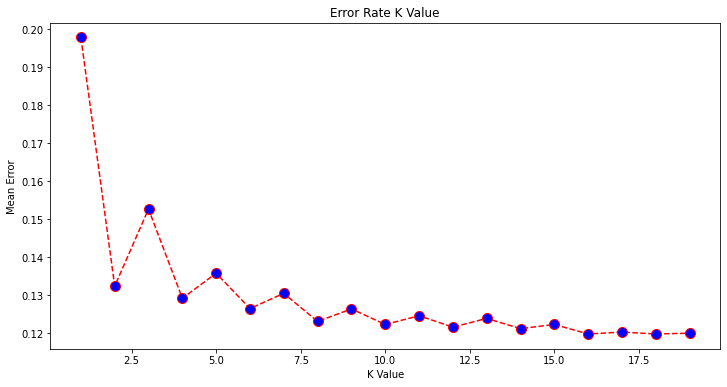

In [40]:
plt.figure(figsize=(12, 6)) 
plt.plot(range(1, 20), error, color='red', linestyle='dashed', marker='o', 
 markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value') 
plt.xlabel('K Value') 
plt.ylabel('Mean Error')

# Random Forest

In [41]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 200, criterion = 'entropy', random_state = 0)
rf.fit(x_train,y_train)
rf_y_pred = rf.predict(x_test)

In [42]:
from sklearn.metrics import classification_report
print(classification_report(y_test, rf_y_pred))

              precision    recall  f1-score   support

           0       0.88      0.99      0.93      8810
           1       0.30      0.04      0.07      1190

    accuracy                           0.87     10000
   macro avg       0.59      0.51      0.50     10000
weighted avg       0.81      0.87      0.83     10000



# Decision Tree

In [43]:
from sklearn.tree import DecisionTreeClassifier
tree_model = DecisionTreeClassifier().fit(x_train, y_train)

In [44]:
from sklearn.metrics import classification_report
# Predict
y_test_pred = tree_model.predict(x_test)
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.89      0.88      0.89      8810
           1       0.20      0.22      0.21      1190

    accuracy                           0.80     10000
   macro avg       0.55      0.55      0.55     10000
weighted avg       0.81      0.80      0.81     10000



# NAIVE BAYES

In [45]:
from sklearn.naive_bayes import GaussianNB
modelnb = GaussianNB()
# Memasukkan data training pada fungsi klasifikasi naive bayes
nbtrain = modelnb.fit(x_train, y_train)
Y_predict = nbtrain.predict(x_test)

In [48]:
from sklearn.metrics import accuracy_score
accuracy= accuracy_score(y_test, Y_predict)
print("Akurasi  : ",accuracy)

Akurasi  :  0.881


In [49]:
from sklearn.metrics import classification_report
print(classification_report(y_test, Y_predict))

              precision    recall  f1-score   support

           0       0.88      1.00      0.94      8810
           1       0.00      0.00      0.00      1190

    accuracy                           0.88     10000
   macro avg       0.44      0.50      0.47     10000
weighted avg       0.78      0.88      0.83     10000



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Import csv

In [50]:
df.to_csv('data_train_diolah.csv')

In [51]:
df_test.to_csv('data_test_diolah.csv')